In [9]:
# imports for conducting baseline model using OLS regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_split import split_data
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics

# load data
data = pd.read_csv('datasets/ny_hp_cleaned.csv')

In [15]:
# split data into train val, test using function from data_split.py
#split_data(dataset, y, test_size, val_size, random_state)
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data, 'price', 20, 20, 42)
X_train.head()

,lot_size,waterfront,age,land_value,new_construct,central_air,fuel_type,heat_type,sewer_type,living_area,pct_college,bedrooms,fireplaces,bathrooms,rooms,test
996,0.40,0,4,30000,0,0,Gas,Hot Air,Public,2131,63,4,1,2.5,10,0
376,0.13,0,25,18300,0,1,Gas,Hot Air,Public,1260,64,2,1,1.5,5,0
358,0.08,0,17,17200,0,1,Gas,Hot Air,Public,1480,64,3,1,1.5,5,1
804,0.31,0,37,21500,0,0,Gas,Hot Water,Public,1782,63,3,1,1.5,6,0
646,0.62,0,1,98000,0,1,Gas,Hot Air,Public,2230,57,3,0,2.5,10,0


In [14]:
selected_variables = X_train.columns.tolist()
model_formula = 'price ~ ' + ' + '.join(selected_variables)
model_bm = smf.ols(formula=model_formula, data=pd.concat([X_train, y_train], axis=1)).fit()
model_bm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     165.6
Date:                Sat, 01 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:34:08   Log-Likelihood:                -20890.
No. Observations:                1688   AIC:                         4.182e+04
Df Residuals:                    1668   BIC:                         4.193e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               9604.6805   1.95e+04      0.493      0.622   -2.86e+04    4.78e+04
fuel_type[T.Gas]        9436.0884    1.2e+04      0.784      0.433   -1.42e+04     3.3e+04
fuel_type[T.Oil]        5532.4998   1.28e+04      0.433      0.665   -1.95e+04    3.06e+04
heat_type[T.Hot Air]    1754.8689   1.22e+04      0.144      0.886   -2.22e+04    2.57e+04
heat_type[T.Hot Water] -7841.0709   1.27e+04     -0.615      0.538   -3.28e+04    1.72e+04
sewer_type[T.Private]   4174.9671    1.7e+04      0.246      0.806   -2.91e+04    3.75e+04
sewer_type[T.Public]    2455.4168   1.69e+04      0.145      0.885   -3.07e+04    3.56e+04
lot_size                7165.1211   2256.129      3.176      0.002    2739.978    1.16e+04
waterfront              1.211e+05   1.54e+04      7.865      0.000    9.09e+04    1.51e+05
age                     -153.7778     58.366     -2.635      0.008    -268.256     -39.299
land_value                 0.9212      0.048     19.354      0.000       0.828       1.015
new_construct          -4.429e+04   7299.868     -6.067      0.000   -5.86e+04      -3e+04
central_air             9600.1616   3480.864      2.758      0.006    2772.839    1.64e+04
living_area               69.2281      4.623     14.975      0.000      60.161      78.295
pct_college              -77.4013    151.701     -0.510      0.610    -374.945     220.142
bedrooms               -7732.0625   2576.687     -3.001      0.003   -1.28e+04   -2678.181
fireplaces             -1116.7109   3007.772     -0.371      0.710   -7016.116    4782.694
bathrooms               2.292e+04   3377.994      6.786      0.000    1.63e+04    2.95e+04
rooms                   3079.7205    961.434      3.203      0.001    1193.977    4965.464
test                    4359.3041   3252.064      1.340      0.180   -2019.253    1.07e+04
==============================================================================
Omnibus:                      583.663   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4800.083
Skew:                           1.385   Prob(JB):                         0.00
Kurtosis:                      10.783   Cond. No.                     1.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

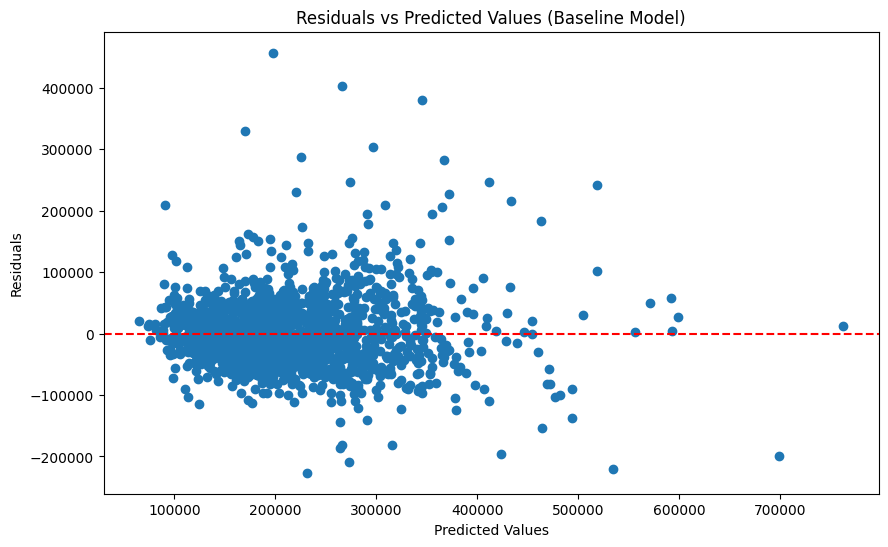

In [18]:
#residual plot
y_pred = model_bm.predict(X_train)
residuals = y_train - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Baseline Model)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.savefig('plots/baseline_model/residuals_baseline_model.png')

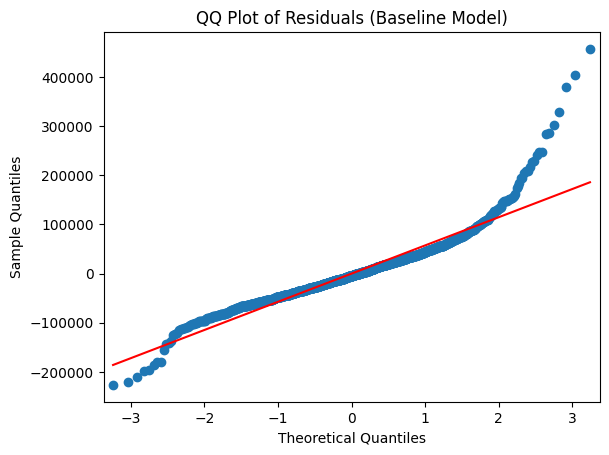

In [20]:
### normality of residuals via qq plot
sm.qqplot(residuals, line ='s')
plt.title('QQ Plot of Residuals (Baseline Model)')
plt.savefig('plots/baseline_model/qqplot_residuals_baseline_model.png')

### Residual analysis
* residuals are fairly normal
* there is slight heteroscedasticity which could be solved via a log transformation and non-paremetric modelling
* data may not be completely linear
* data is iid
* there is an issue of multicolinearity 

### other notes
* there are a number of outliers
